In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

### Part 1 ‑ Exploratory data analysis

In [2]:
login_data = pd.read_json("D:/DataScienceFoundation/SpringBoard/ultimate project/ultimate_challenge/logins.json")

In [3]:
login_data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
login_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
login_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [11]:
df = login_data
df = df.set_index('login_time')
df['login_count'] = 1
df = df.resample('15Min').sum()

In [12]:
df.tail()

,login_count
login_time,
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2
1970-04-13 18:30:00,7
1970-04-13 18:45:00,6


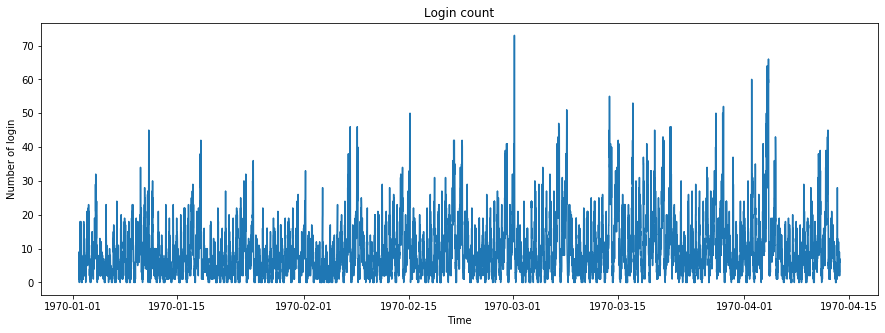

In [13]:
fig,ax = plt.subplots(figsize = (15,5))
plt.xlabel("Time")
plt.ylabel("Number of login")
plt.title("Login count")
plt.plot(df.index ,df.login_count)

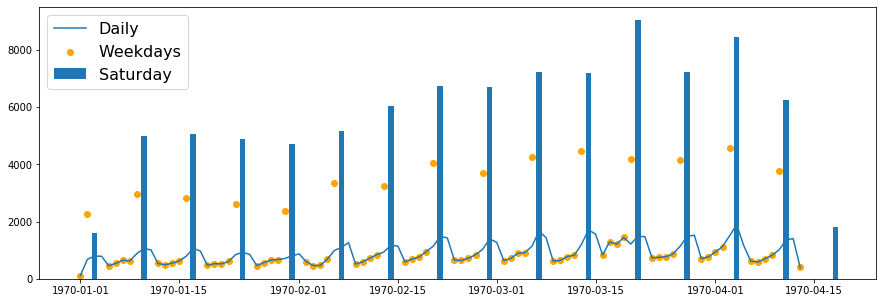

In [60]:
logins_daily = df.resample('D').sum()
logins_businessdays = df.resample('B').sum()
logins_sat = df.resample('W-SAT').sum()
logins_sat = df.resample('W-SAT').sum()
fig,ax = plt.subplots(figsize = (15,5))
plt.plot(logins_daily.index, logins_daily.login_count, label = 'Daily')
plt.bar(logins_sat.index, logins_sat.login_count, label = 'Saturday')
plt.scatter(logins_businessdays.index, logins_businessdays.login_count, label = 'Weekdays',color = "orange")
plt.legend(loc='upper left', fontsize = 16)

### Part 3 ‑ Predictive modeling

In [29]:

# load data
with open('D:/DataScienceFoundation/SpringBoard/ultimate project/ultimate_challenge/ultimate_data_challenge.json') as f:
    data = json.load(f)

In [32]:
user_data = pd.DataFrame(data)
user_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [35]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [116]:
user_data['signup_date']= pd.to_datetime(user_data['signup_date']) 
user_data['last_trip_date']= pd.to_datetime(user_data['last_trip_date']) 
user_data['city'] = user_data['city'].astype(str)

In [117]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null datetime64[ns]
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
active_status             50000 non-null int32
dtypes: bool(1), datetime64[ns](2), float64(6), int32(1), int64(1), object(2)
memory usage: 4.4+ MB


In [42]:

pull_date = user_data.last_trip_date.max()
cut_off_day = pull_date - pd.Timedelta('30 days')
user_data['active_status'] = (user_data.last_trip_date > cut_off_day).astype('int')

In [43]:
user_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_status
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A32EC33288>,
      dtype=object)

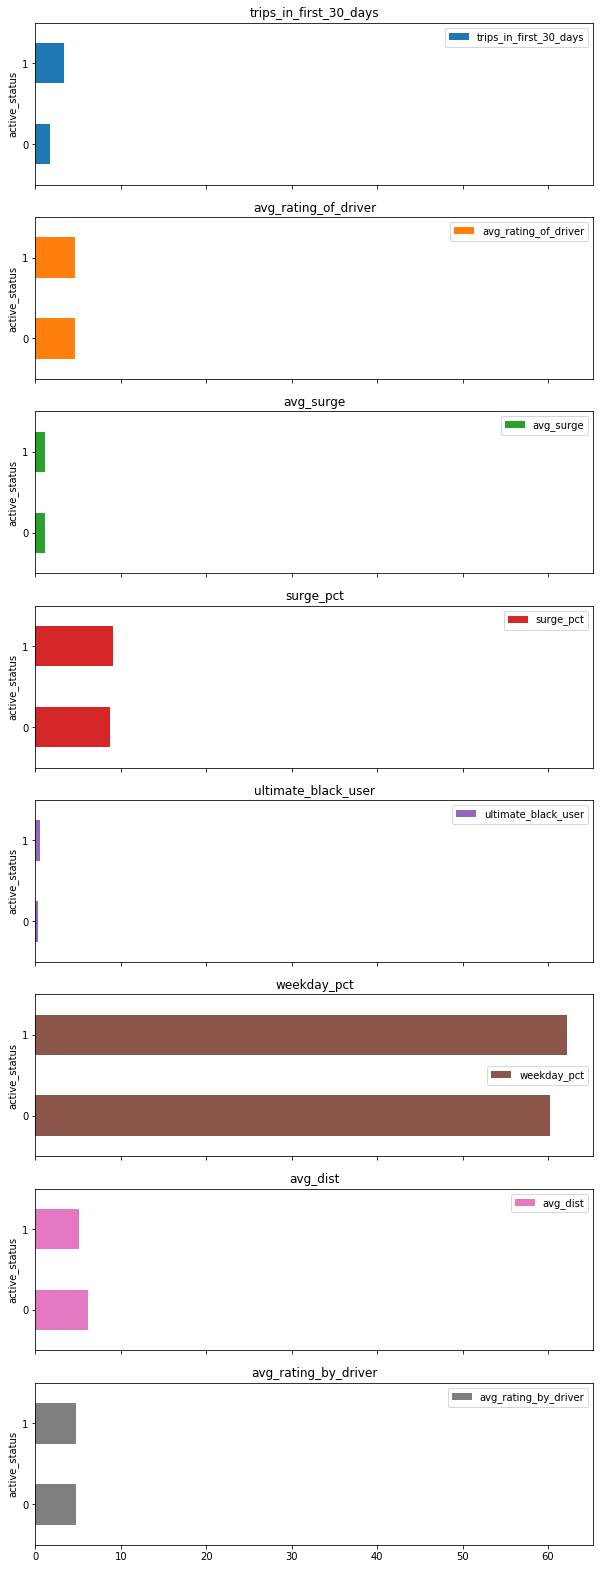

In [56]:
user_data.groupby("active_status").mean().plot.barh(figsize=(10,28),subplots=True )

In [58]:
#Column Statistics 

user_data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active_status
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000,50000.00000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158,0.36620
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652,0.48177
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000,0.00000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000,0.00000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000,1.00000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000,1.00000


In [89]:
active_status = user_data[user_data['active_status'] == 1]
#active_status['tmp'] = active_status.groupby('city')['active_status']
active_status.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_status
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,1
13,King's Landing,0,2014-01-29,4.0,1.38,2014-06-08,iPhone,50.0,False,50.0,3.04,5.0,1
16,King's Landing,1,2014-01-11,5.0,1.00,2014-06-28,Android,0.0,True,50.0,10.86,3.0,1


C:\Users\EliEm\anaconda\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


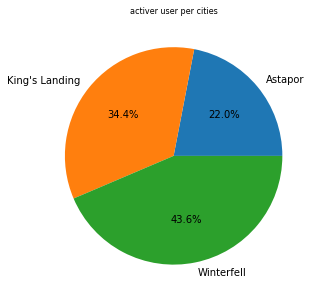

In [92]:
labels = active_status.groupby(['city']).count().index
sizes = active_status[['active_status','city']].groupby('city').sum()
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(sizes, labels=labels, labeldistance=1.1, autopct='%1.1f%%',shadow=False)
plt.title("activer user per cities", fontsize=8)
plt.show()

#### Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

#### 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

- The key metric I would use is change in weekday activity. Specifically, during the daytime hours on weekdays, is there an increase of cars entering the bridge from Gotham and during the night is there an increase of cars entering the bridge from Metropolis. I choose this metric because it is easily measured

#### Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
#### how you will implement the experiment what statistical test(s) you will conduct to verify the significance of the observation how you would interpret the results and provide recommendations to the city operations team along with any caveats.

-- H0: There is no difference between the mean number of cars entering the bridge from Gotham during weekdays between 6 am and 6 pm, two weeks before reimbursements were offered and the mean number of cars two weeks after reimbursements were offered.

-- H2: There is an INCREASE in the mean number of cars entering the bridge from Gotham during weekdays between 6 am and 6 pm, two weeks before reimbursements were offered and the mean number of cars two weeks after reimbursements were offered.

I would use a Z-test to determine the p-value of each hypothesis.

If the p-value is less than 0.05 for the test I would reject the null hypotheses and recommend the reimbursement program continue,that the study should be repeated in a year with more data.

In [97]:
pip install xgboost

  Using cached https://files.pythonhosted.org/packages/5e/49/b95c037b717b4ceadc76b6e164603471225c27052d1611d5a2e832757945/xgboost-0.90-py2.py3-none-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


In [175]:
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance


In [123]:
X = user_data[[ 'avg_rating_of_driver', 'avg_surge','surge_pct','ultimate_black_user','weekday_pct','avg_dist','avg_rating_by_driver']]
y = user_data.active_status

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)

In [154]:
XGBModel = XGBClassifier(objective = 'binary:logistic', max_delta_step = 0.05, subsample = 0.8, 
                         learning_rate=0.1, max_depth= 8, gamma = 3, min_child_weight= 2, scale_pos_weight = 0.9)
XGBModel.fit(X_train, y_train  , verbose=False)
XGBpredictions = XGBModel.predict(X_test)

In [155]:
print(XGBModel.learning_rate)
print(XGBModel.feature_importances_)
print(XGBModel.score)
rmse = np.sqrt(mean_squared_error(y_test, XGBpredictions))
print(rmse)

0.1
[0.1237256  0.05335501 0.02150985 0.41170263 0.04674052 0.04665073
 0.01744549 0.2788702 ]
<bound method ClassifierMixin.score of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=3,
              learning_rate=0.1, max_delta_step=0.05, max_depth=8,
              min_child_weight=2, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.9, seed=None,
              silent=None, subsample=0.8, verbosity=1)>
0.5244044240850758


In [157]:
parameters = {
    'max_delta_step':[0,0.05],
    'scale_pos_weight':[0.95, 0.9],
    'subsample':[1,0.8],
    'learning_rate': [0.25, 0.2, 0.1],
    'min_child_weight':[0,1,2],
    'gamma':[1, 2, 3]
    }

In [164]:
grid_search = GridSearchCV(param_grid= parameters, estimator = XGBModel, cv=3, scoring='accuracy')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=3,
                                     learning_rate=0.1, max_delta_step=0.05,
                                     max_depth=8, min_child_weight=2,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, re...da=1,
                                     scale_pos_weight=0.9, seed=None,
                                     silent=None, subsample=0.8, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'gamma': [1, 2, 3], 'learning_rate': [0.25, 0.2, 0.1],
                         'max_delta_step': [0, 0.05],
                         'min

In [170]:
# Print best parameters and results
y_predit = grid_search.predict(X_test)
score = accuracy_score(y_test, y_predit)
score

0.757

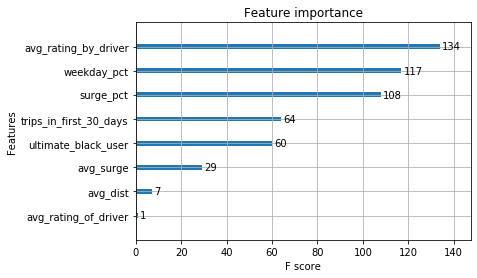

In [176]:
plot_importance(XGBModel)

- The default parameters produced the best performing XGBoost model, resulting in a classification accuracy of 75.70% for the test data. The factors that most important fot rider retention are the surge percerntage and average distance in miles per trip taken in the first 30 days after percent of the user's trips occuring during a weekday.